In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### 1. How to read data when it is available in some database file

In [2]:
con = sqlite3.connect(r'C:\Udemy_PythonProjects\Python-project-Zomato-CaseStudy/zomato_rawdata.sqlite')

In [3]:
pd.read_sql_query('SELECT * FROM Users', con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
df = pd.read_sql_query('SELECT * FROM Users', con)

In [5]:
df.shape

(51717, 18)

In [6]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### 2. How to deal with missing Values?

In [7]:
# If the values in the dataset are null

df.isnull() 

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# We want to know which columns have how many null values.

df.isnull().sum() 

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
# Here, we want the percentage of these missing values

df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
# Here, we are replacing the values like 'NEW, None, -' with the help of "np.nan" which replaces these values with "nan".

df['rate'].replace(('NEW', '-'), np.nan, inplace=True)

C:\Users\CC\AppData\Local\Temp\ipykernel_3644\3065585788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW', '-'), np.nan, inplace=True)


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# lambda x:: Defines an anonymous function with a single argument x.

df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [14]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

### 3. Is there a relation between online order option and rating of the restaurant? 

In [15]:
# The function "crosstab" is used to create the pivot table between 'rate' and 'online_order'.

x = pd.crosstab(df['rate'], df['online_order'])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

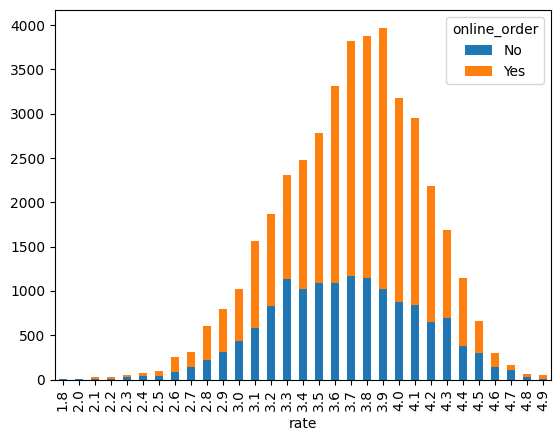

In [16]:
x.plot(kind='bar', stacked=True)

#### Converting the pivot table in % values for easy understanding


In [17]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [18]:
normalized_df = x.div(x.sum(axis=1).astype(float), axis=0)

In [19]:
#Converting the values into %
normalized_df*100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

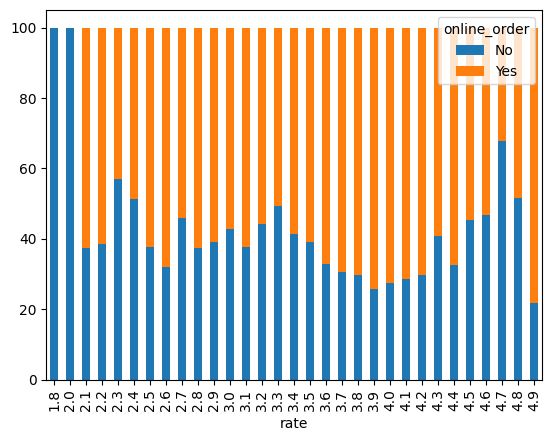

In [20]:
# Creating the 100% Stacked Bar Chart

(normalized_df*100).plot(kind='bar', stacked=True)

### 4. Data Cleaning to perform Text Analysis

In [21]:
df['rest_type'].isnull().sum()

227

In [22]:
data = df.dropna(subset=['rest_type'])

In [23]:
data['rest_type'].isnull().sum()

0

In [24]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [25]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [26]:
quick_bites_df 

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [27]:
quick_bites_df.shape

(20639, 18)

In [28]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [29]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [30]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\CC\AppData\Local\Temp\ipykernel_3644\4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [31]:
from nltk.corpus import RegexpTokenizer

In [32]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [33]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [34]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [35]:
sample = data[0:10000]

In [36]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [37]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

### 4. Performing Unigram Analysis & removal of stopwords.
Stopwords : the words which are useless for the analysis.

In [38]:
# dropping the stopwords

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stop = stopwords.words('english')

In [40]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# we can extend these stop words by adding our won

stop.extend(['rated', "n", "nan", "x", "RATED", "Rated"])

In [42]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [44]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [45]:
# We are simply applying the condition to know the meaningful words for the analysis.

print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [46]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in rev3 if token not in stop])

In [47]:
reviews_tokens_clean

0        [Great, food, proper, Karnataka, style, full, ...
1        [Great, food, proper, Karnataka, style, full, ...
2        [Great, food, proper, Karnataka, style, full, ...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Great, food, proper, Karnataka, style, full, ...
                               ...                        
10046    [Great, food, proper, Karnataka, style, full, ...
10047    [Great, food, proper, Karnataka, style, full, ...
10048    [Great, food, proper, Karnataka, style, full, ...
10049    [Great, food, proper, Karnataka, style, full, ...
10050    [Great, food, proper, Karnataka, style, full, ...
Name: reviews_list, Length: 10000, dtype: object

In [48]:
# converting the Series into 2D list

total_reviews_2D = list(reviews_tokens_clean)

In [49]:
# converting the 2D list into 1D list and appending it to to total_reviews_1D

total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [50]:
total_reviews_1D

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [51]:
from nltk import FreqDist

In [52]:
fd = FreqDist()

In [53]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [54]:
fd.most_common(20)

[('I', 670000),
 ('food', 590000),
 ('south', 270000),
 ('Indian', 230000),
 ('place', 210000),
 ('good', 210000),
 ('taste', 200000),
 ('served', 170000),
 ('The', 150000),
 ('variety', 130000),
 ('quality', 130000),
 ('still', 120000),
 ('There', 110000),
 ('people', 110000),
 ('meal', 110000),
 ('leaf', 110000),
 ('authentic', 100000),
 ('But', 100000),
 ('feel', 100000),
 ('much', 100000)]

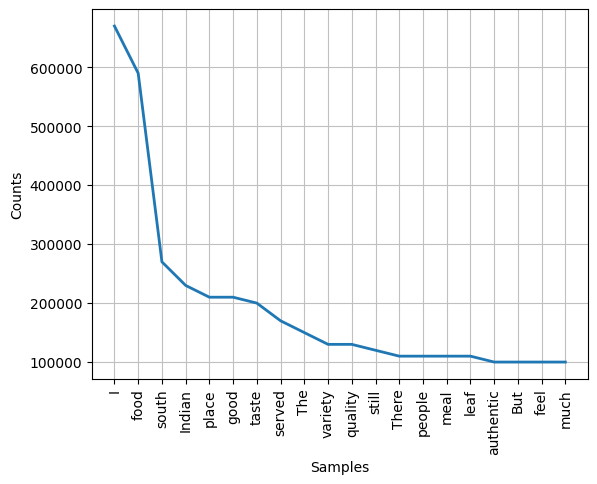

<Axes: xlabel='Samples', ylabel='Counts'>

In [55]:
fd.plot(20)

### 6. Performing Bi-gram & Trigram analysis on data

In [56]:
# FreqDist = FrequencyDistribution

from nltk import FreqDist, bigrams, trigrams

In [57]:
bi_grams = bigrams(total_reviews_1D)

In [58]:
bi_grams

<generator object bigrams at 0x0000015DA66A2340>

In [59]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [60]:
fd_bigrams.most_common(20)

[(('south', 'Indian'), 230000),
 (('Indian', 'food'), 180000),
 (('waiting', 'staffs'), 100000),
 (('authentic', 'south'), 90000),
 (('food', 'served'), 70000),
 (('value', 'money'), 60000),
 (('food', 'quality'), 60000),
 (('quality', 'taste'), 60000),
 (('food', 'I'), 60000),
 (('Food', 'good'), 60000),
 (('Been', 'last'), 50000),
 (('last', 'week'), 50000),
 (('week', 'high'), 50000),
 (('high', 'expectations'), 50000),
 (('expectations', 'based'), 50000),
 (('based', 'reviews'), 50000),
 (('reviews', 'But'), 50000),
 (('But', 'utterly'), 50000),
 (('utterly', 'disappointed'), 50000),
 (('disappointed', 'food'), 50000)]

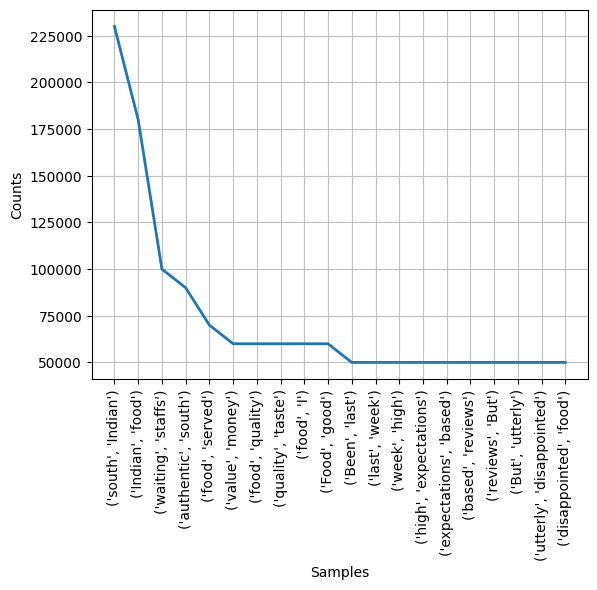

<Axes: xlabel='Samples', ylabel='Counts'>

In [61]:
fd_bigrams.plot(20)

#### Trigram Analysis

In [62]:
tri_grams = trigrams(total_reviews_1D)

In [63]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [64]:
fd_trigrams.most_common(50)

[(('south', 'Indian', 'food'), 180000),
 (('authentic', 'south', 'Indian'), 70000),
 (('Indian', 'food', 'I'), 60000),
 (('Been', 'last', 'week'), 50000),
 (('last', 'week', 'high'), 50000),
 (('week', 'high', 'expectations'), 50000),
 (('high', 'expectations', 'based'), 50000),
 (('expectations', 'based', 'reviews'), 50000),
 (('based', 'reviews', 'But'), 50000),
 (('reviews', 'But', 'utterly'), 50000),
 (('But', 'utterly', 'disappointed'), 50000),
 (('utterly', 'disappointed', 'food'), 50000),
 (('disappointed', 'food', 'quality'), 50000),
 (('food', 'quality', 'taste'), 50000),
 (('quality', 'taste', 'I'), 50000),
 (('taste', 'I', 'feel'), 50000),
 (('I', 'feel', 'overhyped'), 50000),
 (('feel', 'overhyped', 'place'), 50000),
 (('overhyped', 'place', 'There'), 50000),
 (('place', 'There', 'many'), 50000),
 (('There', 'many', 'better'), 50000),
 (('many', 'better', 'places'), 50000),
 (('better', 'places', 'vicinity'), 50000),
 (('places', 'vicinity', 'Plantain'), 50000),
 (('vicinit

### 7. Extract ageographical- Coordinates from Data

In [65]:
!pip install geocoder
!pip install geopy
!pip install --upgrade geocoder

In [66]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [67]:
len(df['location'].unique())

94

In [68]:
# Adding "Bangalore, Karnataka, India" in the 'location' so that while finding the longitute and latitute, the packages will not get confused.

df['location'] = df['location'] + " , Bangalore , Karnataka , India "

In [69]:
df['location']

0            Banashankari , Bangalore , Karnataka , India 
1            Banashankari , Bangalore , Karnataka , India 
2            Banashankari , Bangalore , Karnataka , India 
3            Banashankari , Bangalore , Karnataka , India 
4            Basavanagudi , Bangalore , Karnataka , India 
                               ...                        
51712          Whitefield , Bangalore , Karnataka , India 
51713          Whitefield , Bangalore , Karnataka , India 
51714          Whitefield , Bangalore , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object

In [70]:
df['location'].unique()

array(['Banashankari , Bangalore , Karnataka , India ',
       'Basavanagudi , Bangalore , Karnataka , India ',
       'Mysore Road , Bangalore , Karnataka , India ',
       'Jayanagar , Bangalore , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore , Karnataka , India ',
       'Vijay Nagar , Bangalore , Karnataka , India ',
       'Uttarahalli , Bangalore , Karnataka , India ',
       'JP Nagar , Bangalore , Karnataka , India ',
       'South Bangalore , Bangalore , Karnataka , India ',
       'City Market , Bangalore , Karnataka , India ',
       'Nagarbhavi , Bangalore , Karnataka , India ',
       'Bannerghatta Road , Bangalore , Karnataka , India ',
       'BTM , Bangalore , Karnataka , India ',
       'Kanakapura Road , Bangalore , Karnataka , India ',
       'Bommanahalli , Bangalore , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore , Karnataka , India ',
       'Electronic City , Bangalore , 

In [71]:
# created the copy of 'df' dataframe , so that the menipulations now will be performed on this copies dataframe only.

df_copy = df.copy()

In [72]:
# We are finding the missing values and its sum

df_copy['location'].isnull().sum()

21

In [73]:
# We are just dropping the null values

df_copy = df_copy.dropna(subset=['location'])

In [74]:
df_copy['location'].isnull().sum()

0

In [75]:
locations = pd.DataFrame(df_copy['location'].unique())

In [76]:
locations.columns = ['Name']

In [77]:
locations

,Name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [78]:
from geopy.geocoders import Nominatim

In [79]:
geolocator = Nominatim(user_agent="app", timeout=None)

In [80]:
lat=[]
lon=[]

for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [81]:
locations['latitude'] = lat
locations['longitude'] = lon

In [82]:
locations

,Name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.952813,77.541528
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009652,77.553054
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


#### 8. Build Geographical Heat-Maps

In [83]:
locations.isnull().sum()

Name         0
latitude     2
longitude    2
dtype: int64

In [84]:
locations[locations['latitude'].isna()]

,Name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [85]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [86]:
locations['latitude'][79] = 13.0184435
locations['longitude'][79] = 77.6781

In [87]:
locations['latitude'][85] = 13.0242
locations['longitude'][85] = 77.5748

In [88]:
df['cuisines'].isnull().sum()

45

In [89]:
df = df.dropna(subset=['cuisines'])

In [90]:
# Finding North-Indian restaurants

north_india = df[df['cuisines'].str.contains('North Indian')]

In [91]:
north_india.shape

(21085, 18)

In [92]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [93]:
# frequency table for north-indian restaurants

north_india['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                   2469
HSR , Bangalore , Karnataka , India                   1123
Whitefield , Bangalore , Karnataka , India            1059
Marathahalli , Bangalore , Karnataka , India          1038
JP Nagar , Bangalore , Karnataka , India               958
                                                      ... 
Hebbal , Bangalore , Karnataka , India                   4
Jakkur , Bangalore , Karnataka , India                   3
Central Bangalore , Bangalore , Karnataka , India        2
West Bangalore , Bangalore , Karnataka , India           1
Peenya , Bangalore , Karnataka , India                   1
Name: count, Length: 90, dtype: int64

In [94]:
# converting the above information into dataframe

north_india

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari , Bangalore , Karnataka , India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore , Karnataka , India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi , Bangalore , Karnataka , India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield , Bangalore , Karnataka , India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [95]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={"index":"Count", "location":"Name"})

In [96]:
north_india_rest_count

,Name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , In...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [97]:
heatmap_df = north_india_rest_count.merge(locations, on="Name", how='left')

In [98]:
heatmap_df

,Name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.916360,77.604733
1,"HSR , Bangalore , Karnataka , India",1123,12.900563,77.649475
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , In...",2,12.973393,77.611247
88,"West Bangalore , Bangalore , Karnataka , India",1,13.009652,77.553054


In [99]:
# Greating base map of Bangalore

!pip install folium


In [100]:
import folium

In [101]:
basemap = folium.Map()

In [102]:
basemap

In [103]:
heatmap_df.columns

Index(['Name', 'count', 'latitude', 'longitude'], dtype='object')

In [104]:
from folium.plugins import HeatMap

In [105]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

In [106]:
basemap

### 9. How to Automate your task : i.e. Perform Automation

In [107]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains('North Indian')]

    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={"index":"Count", "location":"Name"})
    heatmap_df = cuisine_rest_count.merge(locations, on="Name", how='left')
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)
    return basemap

In [108]:
get_heatmap("North Indian")

                                            Name  count   latitude  longitude
0           BTM , Bangalore , Karnataka , India    2469  12.916360  77.604733
1           HSR , Bangalore , Karnataka , India    1123  12.900563  77.649475
2    Whitefield , Bangalore , Karnataka , India    1059  12.969637  77.749745
3  Marathahalli , Bangalore , Karnataka , India    1038  12.955257  77.698416


In [109]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)